# Lab Assignment: Comparing Dimensionality Reduction Techniques

In this assignment, you will be comparing the performance of several dimensionality reduction techniques like: 
- Principal Component Analysis (PCA)
- Kernel PCA
- Linear Discriminant Analysis (LDA)
- t-SNE
- Isomap

You will apply these techniques (see empty cells) and reduce the dimensions of the below datasets to `dimension 2`:
1. The Iris dataset *(labeled and linear data)*
2. The Swiss Roll dataset *(non-linear data)*

The data loading steps and preprocessing are done for you. Your task is to implement the above dimensionality reduction methods and plot the results using the provided visualization function ```plot_DR```. Do answer the questions given at the end of this notebook too.

You can have a look at the libraries ```sklearn.decomposition```, ```sklearn.manifold``` and ```sklearn.discriminant_analysis``` to implement these dimensionality reduction methods. 

### Initial Steps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_swiss_roll
from sklearn.preprocessing import StandardScaler

In [2]:
def plot_DR(X_transformed, dataset_name, method_name, labels=None):
    """
    Visualizes the results of dimensionality reduction techniques in a 2D scatter plot.

    Parameters:
    - X_transformed (numpy.ndarray): The transformed data points after applying a dimensionality reduction technique. 
    - dataset_name (str): The name of the dataset being analyzed ("Iris" or "Swiss Roll").
    - method_name (str): The name of the dimensionality reduction method used (e.g., "PCA", "t-SNE").
    - labels (array-like, optional): Class labels for the data points used for coloring. If provided, it allows distinguishing between different categories in the plot.
    """

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap=plt.cm.Spectral)
    plt.title(f'{method_name} on {dataset_name} Dataset (2D)')
    if labels is not None:
        plt.colorbar(scatter) 
    plt.show()

### Iris dataset

In [3]:
# Load
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Preprocess
X_iris, y_iris = iris.data, iris.target
X_iris = StandardScaler().fit_transform(X_iris)

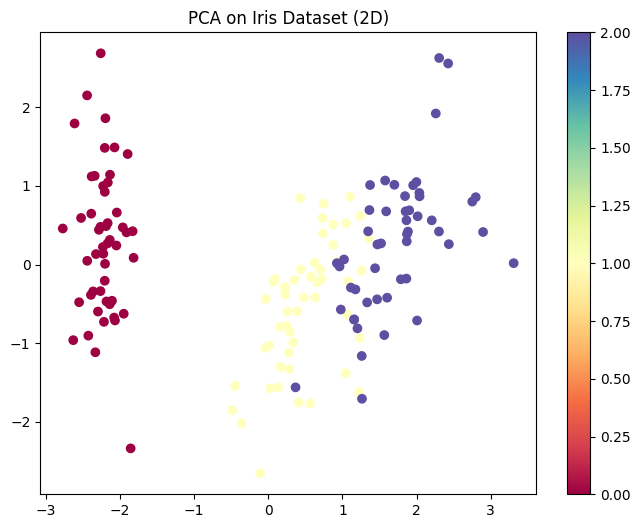

In [5]:
# PCA - Implement the PCA method to reduce the dimensionality of the Iris dataset.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)
plot_DR(X_pca, "Iris", "PCA", labels=y_iris)


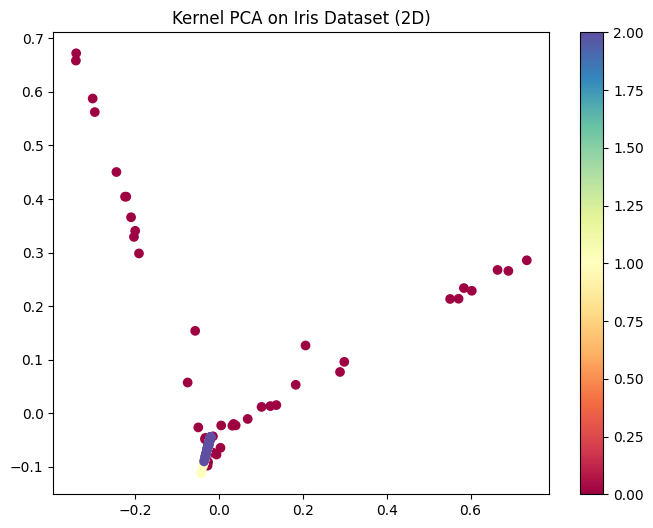

In [6]:
# Kernel PCA - Implement the Kernel PCA method to reduce the dimensionality of the Iris dataset.
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X_iris)
plot_DR(X_kpca, "Iris", "Kernel PCA", labels=y_iris)

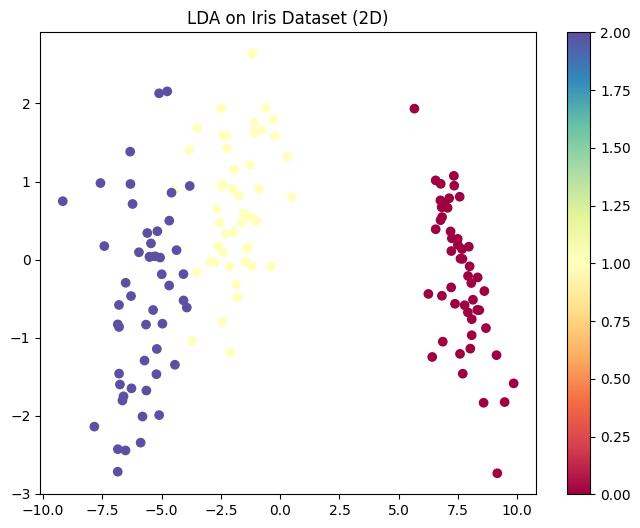

In [7]:
# LDA - Implement the LDA method to reduce the dimensionality of the Iris dataset.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_iris, y_iris)
plot_DR(X_lda, "Iris", "LDA", labels=y_iris)

/home/shusrith/.local/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


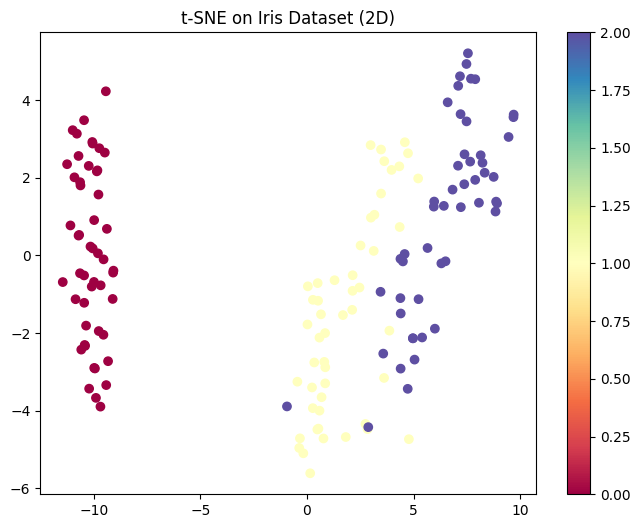

In [8]:
# t-SNE - Implement the t-SNE method to reduce the dimensionality of the Iris dataset.
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_iris)
plot_DR(X_tsne, "Iris", "t-SNE", labels=y_iris)

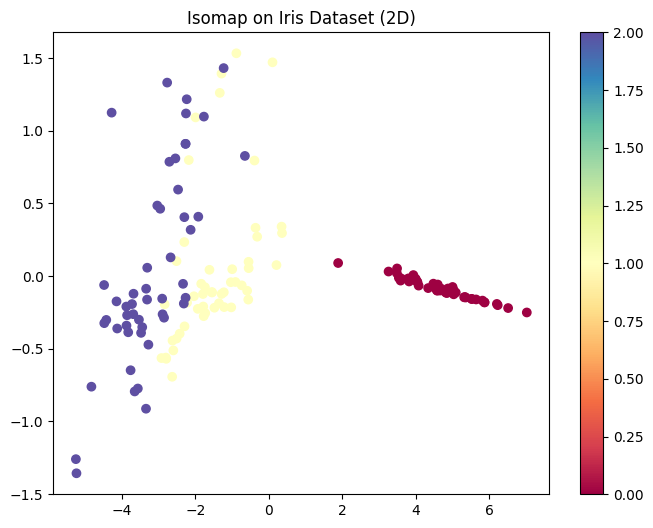

In [9]:
# Isomap - Implement the Isomap method to reduce the dimensionality of the Iris dataset.
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_iris)
plot_DR(X_isomap, "Iris", "Isomap", labels=y_iris)

### Swiss Roll dataset

In [11]:
# Load and Preprocess
X_swiss, color = make_swiss_roll(n_samples=1000)
X_swiss = StandardScaler().fit_transform(X_swiss)

Text(0.5, 0.92, 'Swiss Roll Data (3D)')

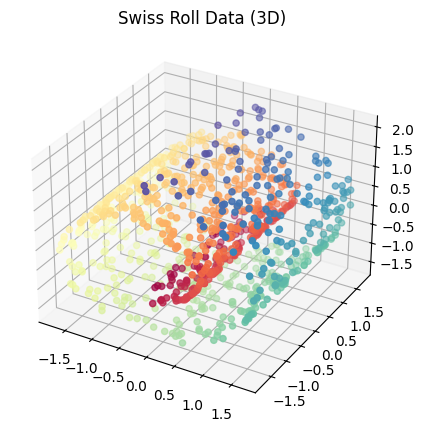

In [12]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')  
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title('Swiss Roll Data (3D)')

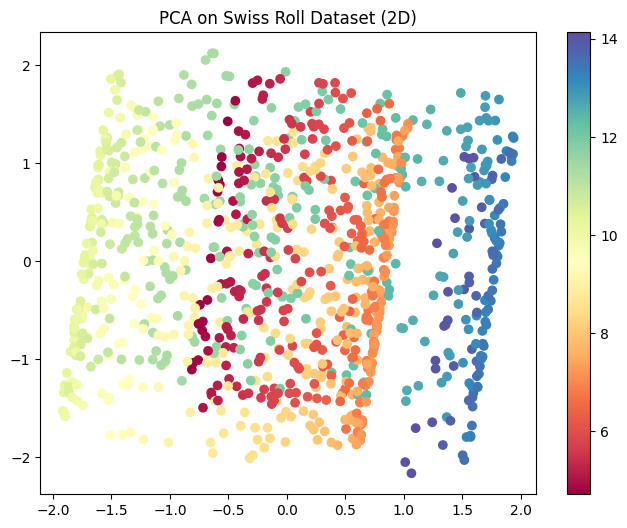

In [13]:
# PCA - Implement the PCA method to reduce the dimensionality of the Swiss Roll dataset.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_swiss)
plot_DR(X_pca, "Swiss Roll", "PCA", labels=color)

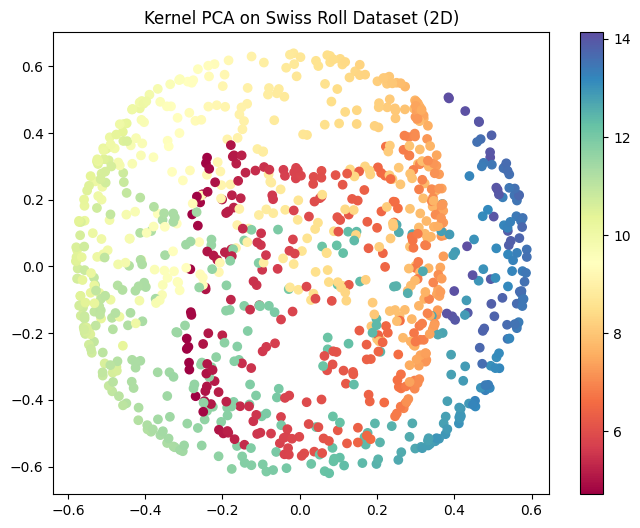

In [14]:
# Kernel PCA - Implement the Kernel PCA method to reduce the dimensionality of the Swiss Roll dataset.
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X_swiss)
plot_DR(X_kpca, "Swiss Roll", "Kernel PCA", labels=color)

/home/shusrith/.local/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


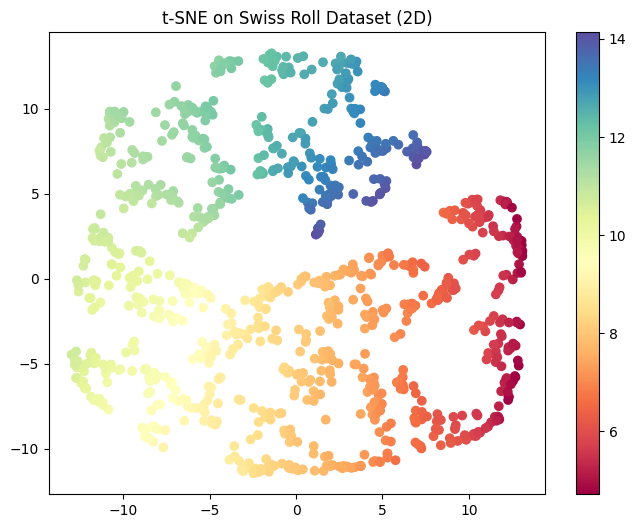

In [15]:
# t-SNE - Implement the t-SNE method to reduce the dimensionality of the Swiss Roll dataset.
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_swiss)
plot_DR(X_tsne, "Swiss Roll", "t-SNE", labels=color)

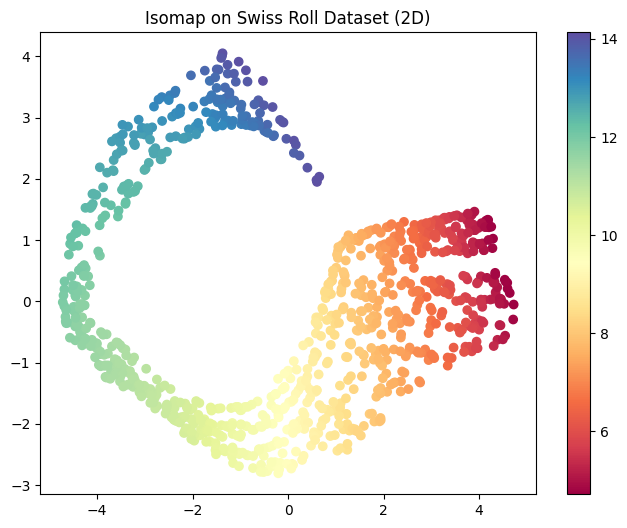

In [16]:
# Isomap - Implement the Isomap method to reduce the dimensionality of the Swiss Roll dataset.
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_swiss)
plot_DR(X_isomap, "Swiss Roll", "Isomap", labels=color)

### Answer the following questions
1. For both datasets, which method seems to provide the best separation of data points, and why?

2. Why can't the LDA method be applied on the Swiss Roll dataset? 

3. Why do we need to standardize the features using **StandardScaler** before applying the different dimensionality reduction methods? How different would the plots look like if we did not standardize the features?

### Answers to the Questions

1. **For both datasets, which method seems to provide the best separation of data points, and why?**

    - For the **Iris dataset**, Linear Discriminant Analysis (LDA) seems to provide the best separation of data points. This is because LDA is a supervised method that maximizes the separation between multiple classes by finding the linear combinations of features that best separate the classes.
    
    - For the **Swiss Roll dataset**, t-SNE appears to provide the best separation. t-SNE is particularly effective for visualizing high-dimensional data by modeling the probability distribution of pairwise similarities in the high-dimensional space and the low-dimensional space, which helps in preserving the local structure of the data.

2. **Why cant the LDA method be applied on the Swiss Roll dataset?**

    - LDA cannot be applied to the Swiss Roll dataset because LDA is a supervised learning method that requires class labels to find the linear combinations of features that best separate the classes. The Swiss Roll dataset is typically used as an example of unsupervised learning and does not have predefined class labels.

3. **Why do we need to standardize the features using StandardScaler before applying the different dimensionality reduction methods? How different would the plots look like if we did not standardize the features?**

    - Standardizing the features using `StandardScaler` is important because many dimensionality reduction techniques, such as PCA, are sensitive to the variances of the features. Standardization ensures that each feature contributes equally to the analysis by scaling the features to have a mean of 0 and a standard deviation of 1.
    
    - If we did not standardize the features, the plots could look significantly different. Features with larger scales would dominate the principal components, leading to misleading results. For example, in PCA, the components would be biased towards the features with higher variance, which might not be the most informative features.